# **GitHub Link -**
https://github.com/umme-asma/M6_AB_UAS_Recommendation/

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample book dataset
books = pd.DataFrame({
    'title': ['The Alchemist', 'Harry Potter', 'Lord of the Rings', 'Sherlock Holmes', 'The Prophet'],
    'description': [
        'A journey of a shepherd discovering his destiny.',
        'A young wizard and his adventures at Hogwarts.',
        'An epic fantasy quest to destroy a powerful ring.',
        'A detective solving mysteries in London.',
        'Philosophical teachings and reflections on life.'
    ]
})

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['description'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend similar books
def recommend_books(title, cosine_sim=cosine_sim):
    idx = books[books['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:4]  # top 3
    book_indices = [i[0] for i in sim_scores]
    return books['title'].iloc[book_indices]

# Test the recommender
print("Recommendations for 'The Alchemist':")
print(recommend_books('The Alchemist'))


Recommendations for 'The Alchemist':
1         Harry Potter
2    Lord of the Rings
3      Sherlock Holmes
Name: title, dtype: object


In [10]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Step 1: Book titles
books = pd.DataFrame({
    'title': ['The Alchemist', 'Harry Potter', 'Lord of the Rings', 'Sherlock Holmes', 'The Prophet']
})

# Step 2: User-book rating matrix (books are rows)
ratings = pd.DataFrame({
    'user1': [5, 3, 0, 0, 2],
    'user2': [4, 0, 4, 1, 3],
    'user3': [0, 4, 5, 0, 1],
    'user4': [1, 1, 0, 5, 0],
}, index=books['title'])

# Step 3: Train KNN model on books (rows) and users (columns)
book_features = ratings.fillna(0).values  # shape: (n_books, n_users)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(book_features)

# Step 4: Recommendation function
def recommend_similar_books(book_title, k=3):
    # Find the index of the given book
    if book_title not in books['title'].values:
        return f"'{book_title}' not found in book list."
    
    idx = books[books['title'] == book_title].index[0]

    # Get distances and indices of nearest neighbors
    distances, indices = model_knn.kneighbors([book_features[idx]], n_neighbors=k+1)

    # Skip the first one (it's the same book)
    recommended_indices = indices.flatten()[1:]
    recommended_books = books['title'].iloc[recommended_indices]
    return recommended_books.reset_index(drop=True)

# Step 5: Test it
print("KNN Recommendations for 'Harry Potter':")
print(recommend_similar_books('Harry Potter'))


KNN Recommendations for 'Harry Potter':
0    Lord of the Rings
1          The Prophet
2        The Alchemist
Name: title, dtype: object


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# Book data
books = pd.DataFrame({
    'title': ['The Alchemist', 'Harry Potter', 'Lord of the Rings', 'Sherlock Holmes', 'The Prophet'],
    'description': [
        'A journey of a shepherd discovering his destiny.',
        'A young wizard and his adventures at Hogwarts.',
        'An epic fantasy quest to destroy a powerful ring.',
        'A detective solving mysteries in London.',
        'Philosophical teachings and reflections on life.'
    ]
})

# User rating matrix
ratings = pd.DataFrame({
    'user1': [5, 3, 0, 0, 2],
    'user2': [4, 0, 4, 1, 3],
    'user3': [0, 4, 5, 0, 1],
    'user4': [1, 1, 0, 5, 0],
}, index=books['title'])

# Transpose ratings for item-based filtering
book_features = ratings.fillna(0).T


In [4]:
#🔹 Content Similarity (TF-IDF)
# TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['description'])
tfidf_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [5]:
#🔹 Collaborative Similarity (KNN)
# Fit KNN
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(book_features.T)

# Generate collaborative similarity matrix
collab_sim = cosine_similarity(book_features.T)


In [6]:
#🔹 Normalize and Combine (Hybrid)
# Normalize both similarity matrices to range [0, 1]
scaler = MinMaxScaler()
tfidf_sim_norm = scaler.fit_transform(tfidf_sim)
collab_sim_norm = scaler.fit_transform(collab_sim)

# Hybrid: weighted sum of both (alpha: weight of content, 1-alpha: collaborative)
alpha = 0.5
hybrid_sim = alpha * tfidf_sim_norm + (1 - alpha) * collab_sim_norm


In [7]:
#🔍 Hybrid Recommendation Function
def hybrid_recommend(book_title, top_n=3):
    idx = books[books['title'] == book_title].index[0]
    sim_scores = list(enumerate(hybrid_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]
    return books['title'].iloc[recommended_indices]


In [8]:
#▶️ Example Usage
print("Hybrid Recommendations for 'The Alchemist':")
print(hybrid_recommend('The Alchemist'))

print("\nHybrid Recommendations for 'Harry Potter':")
print(hybrid_recommend('Harry Potter'))


Hybrid Recommendations for 'The Alchemist':
4          The Prophet
1         Harry Potter
2    Lord of the Rings
Name: title, dtype: object

Hybrid Recommendations for 'Harry Potter':
2    Lord of the Rings
4          The Prophet
0        The Alchemist
Name: title, dtype: object


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import plotly.express as px
import plotly.graph_objects as go

In [2]:
!pip install plotly

In [3]:
data=pd.read_csv("books_data.csv")
print(data.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating  
0  J.K. Rowling/Mary GrandPré           4.57  
1  J.K. Rowling/Mary GrandPré           4.49  
2                J.K. Rowling           4.42  
3  J.K. Rowling/Mary GrandPré           4.56  
4  J.K. Rowling/Mary GrandPré           4.78  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


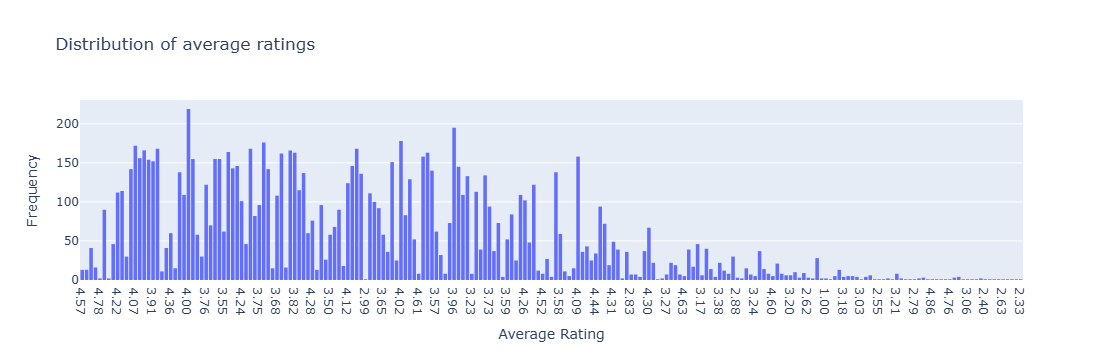

In [5]:
fig =px.histogram(data,x='average_rating',nbins=30,title='Distribution of average ratings')
fig.update_xaxes(title_text='Average Rating')
fig.update_yaxes(title_text='Frequency')
fig.show()

In [6]:
data['average_rating']=pd.to_numeric(data['average_rating'],errors='coerce')

In [7]:
data['book_content']=data['title']+' '+data['authors']

In [8]:
data.head()

,bookID,title,authors,average_rating,book_content
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,Harry Potter and the Half-Blood Prince (Harry ...
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,Harry Potter and the Order of the Phoenix (Har...
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,Harry Potter and the Chamber of Secrets (Harry...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,Harry Potter and the Prisoner of Azkaban (Harr...
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,Harry Potter Boxed Set Books 1-5 (Harry Potte...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookID          11127 non-null  int64  
 1   title           11127 non-null  object 
 2   authors         11127 non-null  object 
 3   average_rating  11123 non-null  float64
 4   book_content    11127 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 434.8+ KB


In [10]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(data['book_content'])

In [11]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [12]:
#recommendation system:
def recommend(book_title,cosine_sim=cosine_sim):
  idx=data[data['title']==book_title].index[0]
  sim_scores=list(enumerate(cosine_sim[idx]))
  sim_scores=sorted(sim_scores,key=lambda x: x[1],reverse=True)
  sim_scores=sim_scores[1:6]
  book_index=[i[0] for i in sim_scores]
  return data['title'].iloc[book_index]

In [13]:
book_title='Anna Karenina'
recommended_books=recommend(book_title)
print(recommended_books)

1633                             Anna Karenina
91                               Anna Karenina
1637                              What is Art?
4032                             Anna Karenina
92      CliffsNotes on Tolstoy's Anna Karenina
Name: title, dtype: object
